# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# dataframe lists
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count 
count_one = 0
set_one = 1

# for-loop to create DF columns
for city in cities:
    try:
        response = requests.get(url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 50:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | sakata
Processing Record 5 of Set 1 | taikang
Processing Record 6 of Set 1 | avera
Processing Record 7 of Set 1 | maloy
Processing Record 8 of Set 1 | katangli
Processing Record 9 of Set 1 | bandarbeyla
Processing Record 10 of Set 1 | sergeyevka
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | antalaha
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | kosa
Processing Record 16 of Set 1 | liepaja
City not found. Skipping...
Processing Record 17 of Set 1 | tevriz
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | biak
Processing Record 21 of Set 1 | moose factory
City not found. Skipping...
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | severo-kurilsk
City not found.

Processing Record 34 of Set 4 | kousseri
Processing Record 35 of Set 4 | kodiak
Processing Record 36 of Set 4 | flinders
Processing Record 37 of Set 4 | garowe
City not found. Skipping...
City not found. Skipping...
Processing Record 38 of Set 4 | stornoway
Processing Record 39 of Set 4 | fougamou
Processing Record 40 of Set 4 | sorong
Processing Record 41 of Set 4 | turka
Processing Record 42 of Set 4 | dwarka
Processing Record 43 of Set 4 | horasan
Processing Record 44 of Set 4 | thompson
Processing Record 45 of Set 4 | luanda
Processing Record 46 of Set 4 | grabs
Processing Record 47 of Set 4 | nanortalik
Processing Record 48 of Set 4 | kuryk
Processing Record 49 of Set 4 | arrecife
Processing Record 50 of Set 4 | shenjiamen
Processing Record 51 of Set 4 | ossora
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | gravdal
Processing Record 3 of Set 5 | batagay
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | prince rupert
Processing Record 6 of

Processing Record 18 of Set 8 | jinhua
City not found. Skipping...
Processing Record 19 of Set 8 | noumea
Processing Record 20 of Set 8 | dolores
Processing Record 21 of Set 8 | ornskoldsvik
Processing Record 22 of Set 8 | waterloo
Processing Record 23 of Set 8 | kapuskasing
Processing Record 24 of Set 8 | inhambane
Processing Record 25 of Set 8 | man
Processing Record 26 of Set 8 | nizhniy tsasuchey
Processing Record 27 of Set 8 | roma
Processing Record 28 of Set 8 | laguna
Processing Record 29 of Set 8 | maiduguri
Processing Record 30 of Set 8 | lata
Processing Record 31 of Set 8 | weligama
City not found. Skipping...
Processing Record 32 of Set 8 | comodoro rivadavia
City not found. Skipping...
Processing Record 33 of Set 8 | ust-maya
Processing Record 34 of Set 8 | port blair
Processing Record 35 of Set 8 | pampa
Processing Record 36 of Set 8 | havelock
Processing Record 37 of Set 8 | umtata
Processing Record 38 of Set 8 | lapao
Processing Record 39 of Set 8 | ilulissat
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create Dataframe and display
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,0,NZ,1592443006,76,-46.19,168.86,44.29,2.73
1,castro,47,BR,1592442893,95,-24.79,-50.01,55.49,5.23
2,hilo,1,US,1592443004,58,19.73,-155.09,84.20,10.29
3,sakata,75,JP,1592443335,54,38.92,139.85,78.80,3.36
4,taikang,10,CN,1592443335,60,46.83,124.42,67.17,3.80


In [5]:
#export to csv
weather_dataframe.to_csv(output_data_file)

In [6]:
weather_dataframe.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
weather_dataframe.loc[weather_dataframe['Humidity'] > 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

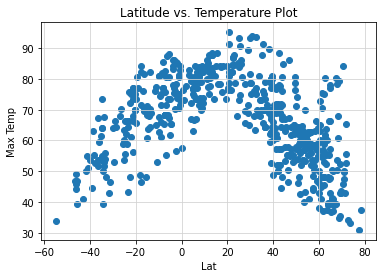

In [10]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"])
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/figure1.png")
plt.show()

There is strong correlation between the lat and the temp.
the trmp becomes higher when closer to equator (0deg)

## Latitude vs. Humidity Plot

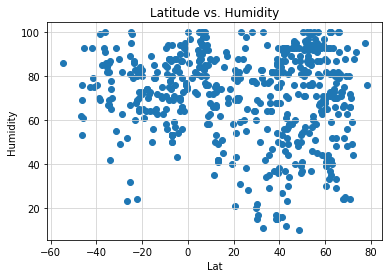

In [11]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"])
plt.title("Latitude vs. Humidity")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/figure2.png")
plt.show()

weak correlation between Lat and Humidity

## Latitude vs. Cloudiness Plot

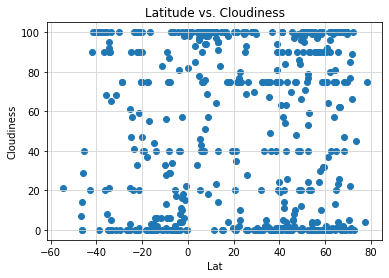

In [12]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"])
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/figure3.png")
plt.show()

weak correlation between Lat and Cloudiness

## Latitude vs. Wind Speed Plot

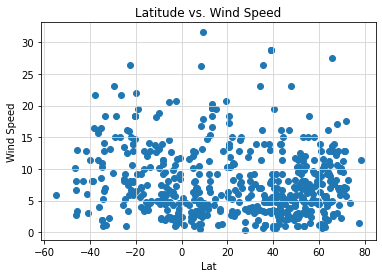

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"])
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/figure4.png")
plt.show()

weak correlation between Lat and Wind Speed